image enhancement and mathematical operations

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

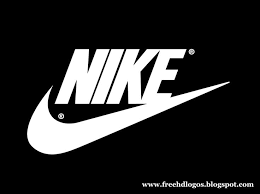

In [2]:
Image(filename = "nike.png")

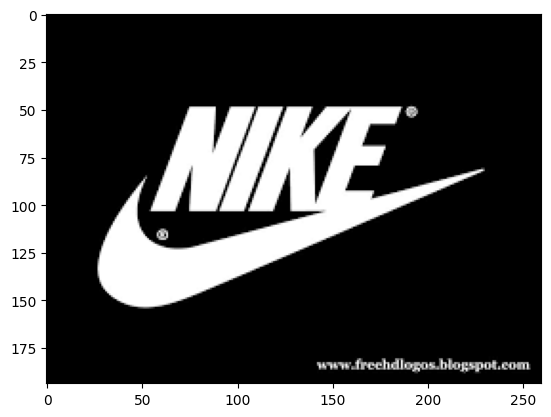

In [3]:
nike = cv2.imread("nike.png" , 1)
nike_c = cv2.cvtColor(nike , cv2.COLOR_BGR2RGB)
plt.imshow(nike_c)

Text(0.5, 1.0, 'darker')

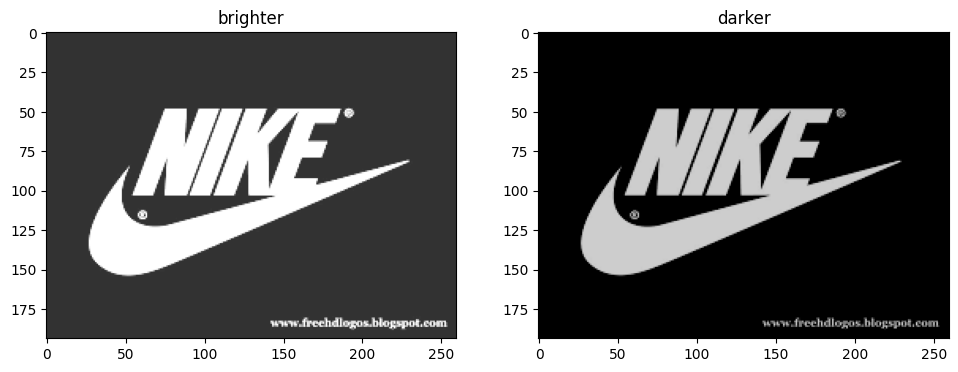

In [6]:
matrix = np.ones(nike.shape, dtype = 'uint8') * 50 

nike_bright = cv2.add(nike, matrix)
nike_dark = cv2.subtract(nike , matrix)

plt.figure(figsize = [18,5])
plt.subplot(131);plt.imshow(nike_bright);plt.title("brighter")
plt.subplot(132);plt.imshow(nike_dark);plt.title("darker")


Text(0.5, 1.0, 'high contrast')

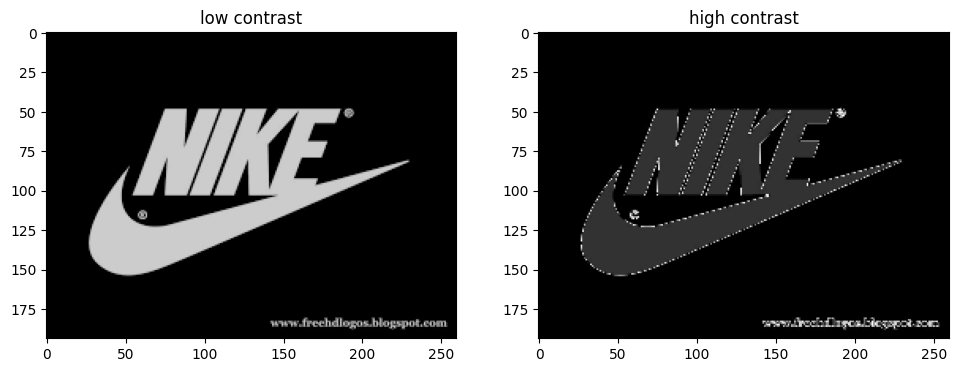

In [12]:
nike_lc = np.ones(nike.shape) * 0.8
nike_hc = np.ones(nike.shape)*1.2

nike_darker = np.uint8(cv2.multiply(np.float64(nike) , nike_lc))

nike_brighter = np.uint8(cv2.multiply(np.float64(nike) , nike_hc))

plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(nike_darker);plt.title("low contrast")
plt.subplot(132);plt.imshow(nike_brighter);plt.title("high contrast")


Text(0.5, 1.0, 'threshold')

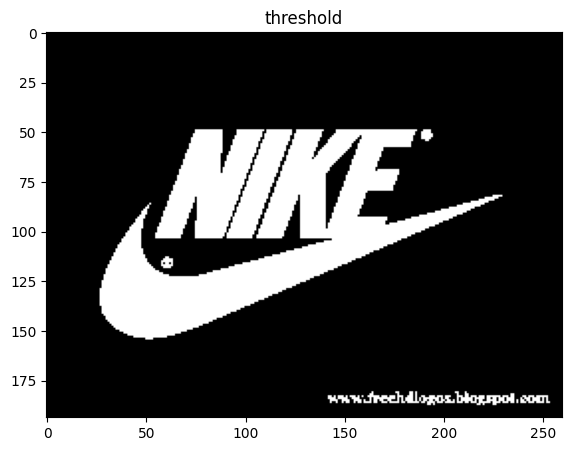

In [24]:
retval , nike_tresh = cv2.threshold(nike , 100 , 255 ,cv2.THRESH_BINARY)
plt.figure(figsize = [18,5])
plt.subplot(121) ; plt.imshow(nike_tresh , cmap = "gray");plt.title("threshold")


add background 

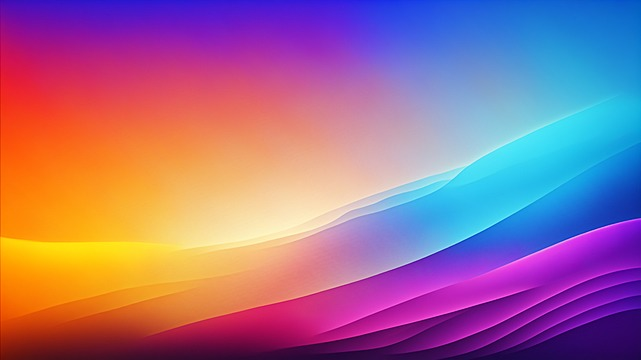

In [25]:
Image(filename = 'back.jpg')

(360, 641, 3)


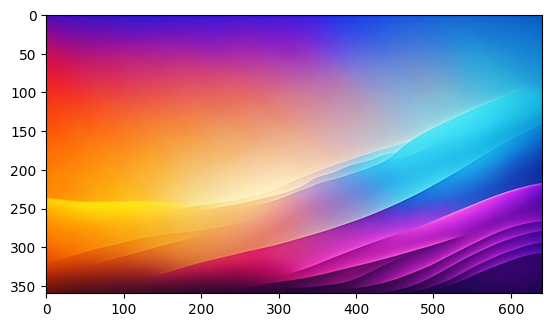

In [26]:
back = cv2.imread('back.jpg')
back = cv2.cvtColor(back , cv2.COLOR_BGR2RGB)
plt.imshow(back)
print(back.shape)

In [27]:
print(nike.shape)

(194, 260, 3)


In [29]:
back = cv2.resize(back , (260 , 194) , interpolation = cv2.INTER_AREA )
print(back.shape)

(194, 260, 3)


create mask :

(194, 260)


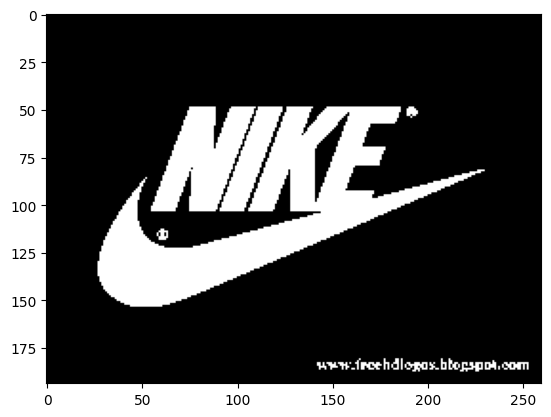

In [31]:
nike_g = cv2.cvtColor(nike , cv2.COLOR_RGB2GRAY)

retval , mask = cv2.threshold(nike_g , 127 , 255 , cv2.THRESH_BINARY)

plt.imshow(mask, cmap = 'gray')
print(mask.shape)


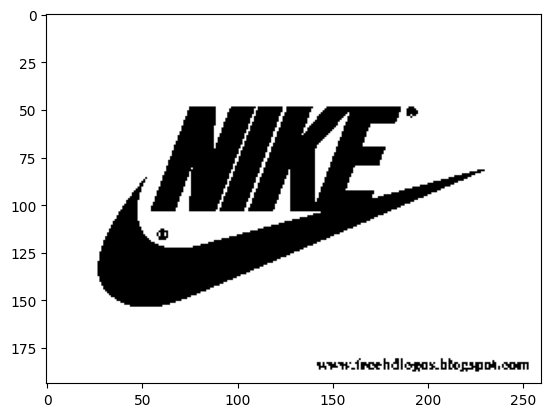

In [32]:
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv , cmap = 'gray')


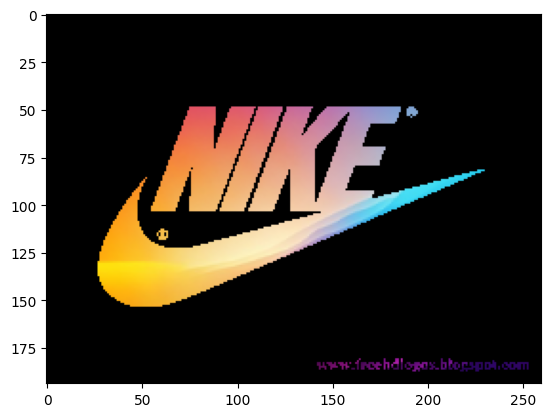

In [33]:
back_nike = cv2.bitwise_and(back , back , mask = mask)
plt.imshow(back_nike)